<a href="https://colab.research.google.com/github/SarahMason2015/Billionaires/blob/Sarah_week1/BillionairesDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from pathlib import Path
from sklearn.linear_model import LinearRegression


In [10]:
billion_df = pd.read_csv("billionaires_dataset.csv")
billion_df.head()

,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,1975,Microsoft,founder,Software,new,40,male,United States,North America,Technology-Computer,not inherited
1,1975,Microsoft,founder,Software,new,45,male,United States,North America,Technology-Computer,not inherited
2,1975,Microsoft,founder,Software,new,58,male,United States,North America,Technology-Computer,not inherited
3,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,North America,Consumer,not inherited
4,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,North America,Consumer,not inherited


In [11]:
billion_df.drop('company.founded', axis = 1, inplace = True)

In [12]:
billion_df.rename(columns = {'location.citizenship': 'country'}, inplace = True)
billion_df.head()

,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,country,location.region,wealth.how.industry,wealth.how.inherited
0,Microsoft,founder,Software,new,40,male,United States,North America,Technology-Computer,not inherited
1,Microsoft,founder,Software,new,45,male,United States,North America,Technology-Computer,not inherited
2,Microsoft,founder,Software,new,58,male,United States,North America,Technology-Computer,not inherited
3,Berkshire Hathaway,founder,Finance,new,65,male,United States,North America,Consumer,not inherited
4,Berkshire Hathaway,founder,Finance,new,70,male,United States,North America,Consumer,not inherited


# Joining Two DataFrames


In [15]:
latlng_df = pd.read_csv("LatLngCountriesBillionaires.csv")
latlng_df.head(10)

,latitude,longitude,country
0,28.033886,1.659626,Algeria
1,NaN,NaN,Angola
2,NaN,NaN,Argentina
3,NaN,NaN,Australia
4,NaN,NaN,Austria
5,NaN,NaN,Belgium
6,NaN,NaN,Brazil
7,NaN,NaN,Canada
8,NaN,NaN,Chile
9,NaN,NaN,China


In [16]:
joined_df = pd.merge(billion_df, latlng_df, on=['country'])
joined_df.head()

,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,country,location.region,wealth.how.industry,wealth.how.inherited,latitude,longitude
0,Microsoft,founder,Software,new,40,male,United States,North America,Technology-Computer,not inherited,37.09024,-95.712891
1,Microsoft,founder,Software,new,45,male,United States,North America,Technology-Computer,not inherited,37.09024,-95.712891
2,Microsoft,founder,Software,new,58,male,United States,North America,Technology-Computer,not inherited,37.09024,-95.712891
3,Berkshire Hathaway,founder,Finance,new,65,male,United States,North America,Consumer,not inherited,37.09024,-95.712891
4,Berkshire Hathaway,founder,Finance,new,70,male,United States,North America,Consumer,not inherited,37.09024,-95.712891


# Cleaning code in DataFrame ***billion_df***

In [ ]:
billion_df.head(5)

,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,male,United States,North America,Technology-Computer,not inherited
1,45,male,United States,North America,Technology-Computer,not inherited
2,58,male,United States,North America,Technology-Computer,not inherited
3,65,male,United States,North America,Consumer,not inherited
4,70,male,United States,North America,Consumer,not inherited


In [ ]:
zero = billion_df.loc[billion_df['location.region'] == 0]
zero

,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited


In [ ]:
billion_df.nunique()

demographics.age        76
demographics.gender      2
location.citizenship    73
location.region          7
wealth.how.industry     19
wealth.how.inherited     6
dtype: int64

In [ ]:
billion_df['location.citizenship'].value_counts()

#good place for binning or bucketing
# actually leave all in, even 1 values

United States    903
Germany          160
China            153
Russia           119
Japan             96
                ... 
Bahrain            1
Ecuador            1
Georgia            1
Bermuda            1
Tanzania           1
Name: location.citizenship, Length: 73, dtype: int64

In [ ]:
billion_df['location.region'].value_counts()
#remove null value here
#Ben

North America               993
Europe                      698
East Asia                   535
Latin America               182
Middle East/North Africa    117
South Asia                   69
Sub-Saharan Africa           20
Name: location.region, dtype: int64

In [ ]:
billion_df['wealth.how.industry'].value_counts()

#needs cleaning, combining
#consider a spiral chart
#ANDREW will combine several of these columns with the help of his tutor on Tuesday


Consumer                           471
Retail, Restaurant                 281
Real Estate                        280
Money Management                   249
Media                              219
Technology-Computer                208
Diversified financial              167
Energy                             132
Technology-Medical                 111
Non-consumer industrial            107
Constrution                         97
Mining and metals                   90
Other                               83
Hedge funds                         67
Private equity/leveraged buyout     25
0                                   16
Venture Capital                      8
banking                              1
services                             1
Name: wealth.how.industry, dtype: int64

In [ ]:
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Money Management': 'Financial'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Diversified financial': 'Financial'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Hedge funds': 'Financial'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'banking': 'Financial'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Venture Capital': 'Financial'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Private equity/leveraged buyout': 'Financial'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Technology-Computer': 'Technology'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Technology-Medical': 'Technology'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Constrution': 'Construction'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Non-consumer industrial': 'Construction'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'Mining and metals': 'Construction'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'0': 'Other'})
billion_df['wealth.how.industry'] = billion_df["wealth.how.industry"].replace({'services': 'Consumer'})
billion_df['wealth.how.industry'].value_counts()


Financial             517
Consumer              472
Technology            319
Construction          294
Retail, Restaurant    281
Real Estate           280
Media                 219
Energy                132
Other                  99
Name: wealth.how.industry, dtype: int64

In [ ]:
billion_df['wealth.how.inherited'].value_counts()
#combine all columns that aren't "not inherited". Combine all non-"non inherited" columns.
#Sarah will do this

not inherited               1688
father                       558
3rd generation               210
4th generation                68
spouse/widow                  59
5th generation or longer      31
Name: wealth.how.inherited, dtype: int64

In [ ]:
billion_df['wealth.how.inherited'] = billion_df["wealth.how.inherited"].replace({'5th generation or longer': 'inherited'})
billion_df['wealth.how.inherited'] = billion_df["wealth.how.inherited"].replace({'spouse/widow': 'inherited'})
billion_df['wealth.how.inherited'] = billion_df["wealth.how.inherited"].replace({'father': 'inherited'})
billion_df['wealth.how.inherited'] = billion_df["wealth.how.inherited"].replace({'4th generation': 'inherited'})
billion_df['wealth.how.inherited'] = billion_df["wealth.how.inherited"].replace({'3rd generation': 'inherited'})
billion_df['wealth.how.inherited'].value_counts()


not inherited    1688
inherited         926
Name: wealth.how.inherited, dtype: int64

In [ ]:
billion_df['demographics.gender'].value_counts()
#remove married couple 
#Ben. Remove these "married couple" rows from the datafram

male      2328
female     252
Name: demographics.gender, dtype: int64

In [ ]:
billion_df.to_csv('billionaires_clean.csv')

In [ ]:
billion_df.duplicated().value_counts()

False    1983
True      631
dtype: int64

In [ ]:
billion_df

,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,male,United States,North America,Technology,not inherited
1,45,male,United States,North America,Technology,not inherited
2,58,male,United States,North America,Technology,not inherited
3,65,male,United States,North America,Consumer,not inherited
4,70,male,United States,North America,Consumer,not inherited
...,...,...,...,...,...,...
2609,55,male,Taiwan,East Asia,Construction,not inherited
2610,0,male,China,East Asia,Consumer,not inherited
2611,53,male,China,East Asia,Real Estate,not inherited
2612,53,male,Czech Republic,Europe,Construction,not inherited


In [ ]:
billion_df.to_csv('billion_clean.csv')

In [ ]:
#Rename columns with simpler titles
# Then get back to this dataframe error.

# Linear Regression with Billionaires, Company foundings

In [ ]:
billionaires_df = pd.read_csv("billionaires.csv")
billionaires_df.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,...,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True


In [ ]:
billionaires_df.rename(columns={'company.founded':'co_founded', 'wealth.worth in billions':'wealth_bb'}, inplace=True)
billionaires_df.head(5)

,name,rank,year,co_founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth_bb,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [ ]:
billionaires_df['co_founded'].value_counts()


1962    57
1995    54
1972    51
1993    48
1969    48
        ..
1789     1
1848     1
1863     1
1900     1
1907     1
Name: co_founded, Length: 178, dtype: int64

In [ ]:
billion_com_clean = billionaires_df[billionaires_df.co_founded !=0]
# ref: https://www.codegrepper.com/code-examples/python/delete+row+with+zero+value+in+a+column+pyton

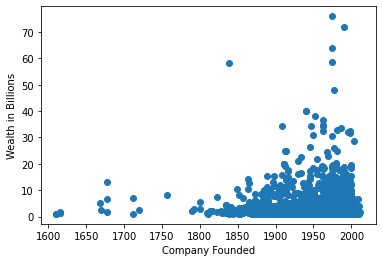

In [ ]:
#from 17.2.3
plt.scatter(billion_com_clean.co_founded, billion_com_clean.wealth_bb)
plt.xlabel('Company Founded')
plt.ylabel('Wealth in Billions')
plt.show()

In [ ]:
model = LinearRegression()

In [ ]:
X = billion_com_clean.co_founded.values.reshape(-1, 1)
y = billion_com_clean.wealth_bb

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
y_pred= model.predict(X)
print(y_pred.shape)

(2574,)


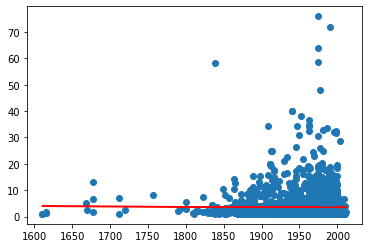

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred, color = 'red')
plt.show()
#All that work for nothing! At least I got to experiment with Linear Regression 

# Logistic Regression to Predict Aires vs Heirs

In [ ]:
billion_df.head(5)

,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,male,United States,North America,Technology,not inherited
1,45,male,United States,North America,Technology,not inherited
2,58,male,United States,North America,Technology,not inherited
3,65,male,United States,North America,Consumer,not inherited
4,70,male,United States,North America,Consumer,not inherited


In [ ]:


from sklearn.preprocessing import LabelEncoder

In [ ]:
#17.6.3
le = LabelEncoder()

In [ ]:
billion2df = billion_df.copy()
billion2df['demographics.gender'] = le.fit_transform(billion2df['demographics.gender'])
billion2df.head(5)

,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,1,United States,North America,Technology,not inherited
1,45,1,United States,North America,Technology,not inherited
2,58,1,United States,North America,Technology,not inherited
3,65,1,United States,North America,Consumer,not inherited
4,70,1,United States,North America,Consumer,not inherited


In [ ]:
billion2df['location.region'] = le.fit_transform(billion2df['location.region'])
billion2df['wealth.how.industry'] = le.fit_transform(billion2df['wealth.how.industry'])
billion2df['wealth.how.inherited'] = le.fit_transform(billion2df['wealth.how.inherited'])
billion2df.head(5)


,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,1,United States,4,8,1
1,45,1,United States,4,8,1
2,58,1,United States,4,8,1
3,65,1,United States,4,1,1
4,70,1,United States,4,1,1


In [ ]:
billion_encoded = billion2df.drop(['location.citizenship'], axis = 1)

In [ ]:
billion_encoded.head(5)

,demographics.age,demographics.gender,location.region,wealth.how.industry,wealth.how.inherited
0,40,1,4,8,1
1,45,1,4,8,1
2,58,1,4,8,1
3,65,1,4,1,1
4,70,1,4,1,1


In [ ]:
billion_encoded.to_csv("billion_encoded.csv")

In [ ]:
y = billion_encoded['wealth.how.inherited']
y

0       1
1       1
2       1
3       1
4       1
       ..
2609    1
2610    1
2611    1
2612    1
2613    1
Name: wealth.how.inherited, Length: 2614, dtype: int64

In [ ]:
X = billion_encoded.drop(['wealth.how.inherited'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
# data_scaler = StandardScaler()
# billions_caled = data_scaler.fit_transform(X)